# Test model on unseen data

In [1]:
from pathlib import Path
import torch as th 
from models import MODEL_REGISTRY
import matplotlib.pyplot as plt 

In [2]:
ROOT = Path(__name__).absolute().parent 
model_path = ROOT / "trained" / "model8_gap"

model = MODEL_REGISTRY["model8_gap"]()
model.load_state_dict(th.load(model_path, map_location=th.device('cpu')))
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.1, inplace=False)
  )
  (1): Sequential(
    (0): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.2, 

In [60]:
from PIL import Image
import PIL

ship = Image.open(ROOT / "data/ship.jpeg")
bird = Image.open(ROOT / "data/bird.jpeg")
car = Image.open(ROOT / "data/car.jpeg")


In [61]:
def resize(img, target_h):
    wpercent = (target_h / float(img.size[0]))
    wsize = int((float(img.size[1]) * float(wpercent)))
    return img.resize((target_h, wsize), Image.ANTIALIAS)

ship_resized = resize(ship, 36)
bird_resized = resize(bird, 32)
car_resized = resize(car, 36)


/tmp/ipykernel_28657/3242528635.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return img.resize((target_h, wsize), Image.ANTIALIAS)


(36, 24)
tensor([[4.1478e-06, 8.9159e-08, 1.1338e-09, 5.7960e-11, 8.8824e-11, 6.3078e-11,
         7.2382e-10, 2.4992e-11, 1.0000e+00, 4.2600e-10]],
       grad_fn=<SoftmaxBackward0>)


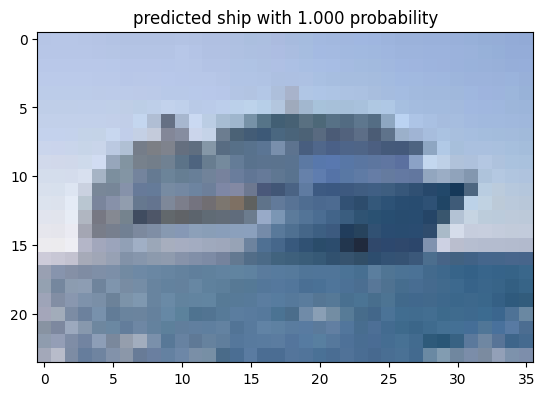

(32, 23)
tensor([[2.5862e-07, 1.7485e-10, 1.0000e+00, 6.3333e-10, 3.4252e-08, 1.6418e-06,
         1.0169e-08, 2.3658e-08, 6.2377e-09, 1.2600e-09]],
       grad_fn=<SoftmaxBackward0>)


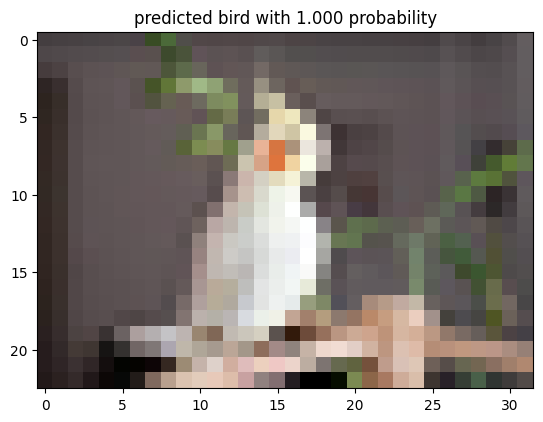

(36, 23)
tensor([[3.4080e-09, 1.0000e+00, 2.1951e-08, 1.8946e-09, 1.3375e-09, 7.7634e-09,
         3.7233e-09, 1.0411e-09, 1.7326e-08, 1.7392e-07]],
       grad_fn=<SoftmaxBackward0>)


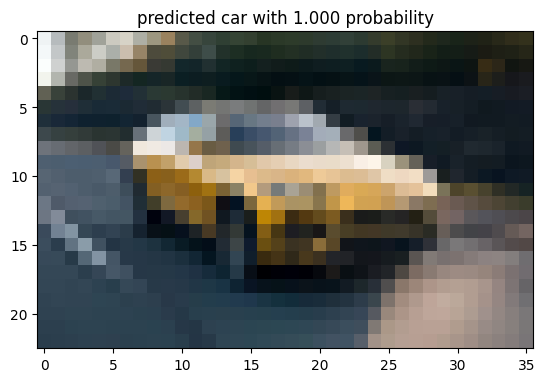

In [63]:
classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

def predict(model, tensor):
    # with th.no_grad():
    probas = model(img_th.unsqueeze(0))
    print(probas)
    label = th.argmax(probas)
    score = th.max(probas)
    plt.title(f"predicted {classes[label]} with {score:.3f} probability")
    plt.imshow(tensor.squeeze(0).permute(1, 2, 0))
    plt.show()

for img in [ship_resized, bird_resized, car_resized]:
    print(img.size)
    img_th = transforms.ToTensor()(img)
    predict(model, img_th)